In [2]:
import tensorflow as tf

three Keras APIs - Sequential [for beginners], functional APIs [for engineers on general and niche applications] and model subclassing [researchers who write models from scratch]

Sequential model using the add API

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
model = keras.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

2024-02-28 12:30:50.413200: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-02-28 12:30:50.413218: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-28 12:30:50.413222: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-28 12:30:50.413251: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-28 12:30:50.413268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


not yet built as no build() method is called or the model is called on some data to determine the shape of the input data

In [5]:
#model.weights
#error since model weights are not yet built

In [6]:
model.build(input_shape=(None,3)) # building the model with input shape -> None denotes batch_size and 3 is the number of input nodes

In [7]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.02912402, -0.08236583, -0.29870865, -0.02672783, -0.14385518,
          0.09198654, -0.00393033, -0.13328063,  0.12800243, -0.23704576,
          0.19856602,  0.29790604, -0.09988689, -0.05331922,  0.15621898,
          0.03115842, -0.21756928,  0.00487345,  0.2749334 ,  0.12917167,
         -0.14229189,  0.14039633,  0.27130294,  0.05528036, -0.0732365 ,
         -0.09343645, -0.25390145, -0.11776671,  0.13745987,  0.0126178 ,
          0.1592887 , -0.25593948, -0.04902139,  0.29651582, -0.0760946 ,
          0.19898134,  0.07263625, -0.12151559,  0.15864822, -0.18253547,
         -0.00975326, -0.261353  , -0.24788573,  0.1384711 , -0.20628597,
         -0.18175365,  0.19798926, -0.20343629, -0.2563877 ,  0.1718863 ,
         -0.03691924,  0.10954157,  0.12204108, -0.20166671, -0.23058555,
         -0.03928575,  0.2840098 ,  0.20001274,  0.26337147, -0.13768913,
          0.07520804,  0.13000408, -0.1235904

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64,activation='relu',name="my_first_layer"))
model.add(layers.Dense(10,activation='softmax',name="my_second_layer"))

In [10]:
model.build(input_shape=(None,3))

In [11]:
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_second_layer (Dense)     (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


building a model on the fly giving the input shape.

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Functional API - more flexible than sequential API - used when there is multi input multi output, non-linear topology etc

In [14]:
inputs = keras.Input(shape=(3,),name="input_layer")
features = layers.Dense(64, activation='relu') (inputs)
outputs = layers.Dense(10, activation="softmax") (features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


A multi input , multi output model built using the keras functional API

In [16]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate() ([title,text_body,tags])
features = layers.Dense(64, activation='relu') (features)

priority = layers.Dense(1, activation='sigmoid', name='priority') (features)
department = layers.Dense(num_departments, activation='softmax', name = 'department') (features)

model = keras.Model(inputs = [title,text_body, tags], outputs = [priority, department])




In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',     

In [18]:
import numpy as np 
num_samples = 1280  # for illustration
# random data for example
title_data = np.random.randint(0,2,size=(num_samples,vocabulary_size))
text_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [19]:
model.compile(optimizer='rmsprop',loss=['mean_squared_error', 'categorical_crossentropy'],metrics=['mean_absolute_error', 'accuracy'])
model.fit([title_data, text_data, tags_data],
[priority_data, department_data],
epochs=1)
model.evaluate([title_data, text_data, tags_data],
[priority_data, department_data])



2024-02-28 12:30:51.068328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 11ms/step - loss: 20.7577 - priority_loss: 0.3275 - department_loss: 20.4302 - priority_mean_absolute_error: 0.4960 - priority_accuracy: 0.0000e+00 - department_mean_absolute_error: 0.4883 - department_accuracy: 0.0641


[20.757659912109375,
 0.3274786174297333,
 20.430179595947266,
 0.49599775671958923,
 0.0,
 0.4882965683937073,
 0.06406249850988388]

In [20]:
priority,department=  model.predict([title_data, text_data, tags_data])


40/40 [==============================] - 0s 2ms/step


In [21]:
priority.shape, department.shape

((1280, 1), (1280, 4))

in case you do not want to mess up the order, we can also pass dictionary to the apis like model.fit({'title':title_data}) etc

functional api also provides tools to visualizet the topology of the model in a graph-like structure

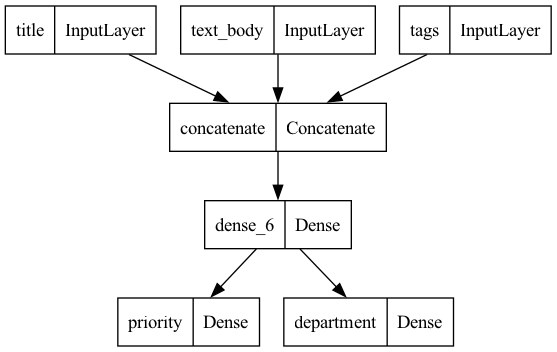

In [22]:
keras.utils.plot_model(model, "ticket_classifier.png")

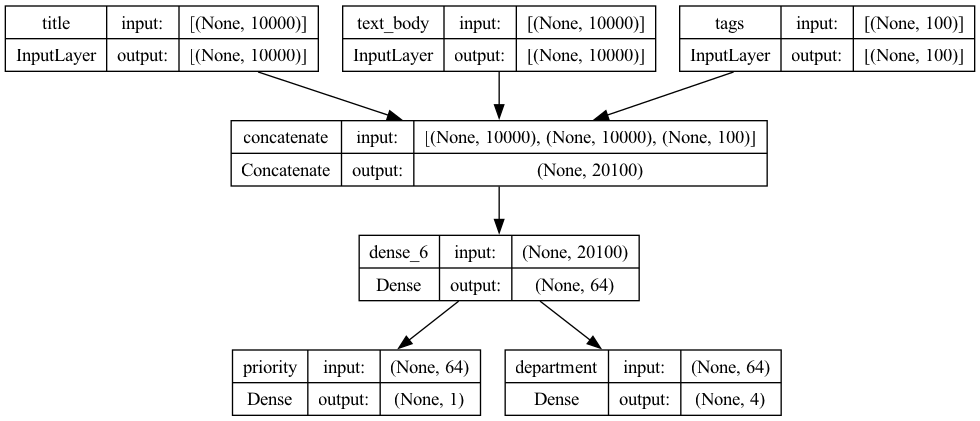

In [23]:
keras.utils.plot_model(model, "ticket_classifier_withshape.png",show_shapes=True)

In [24]:
model.layers

In [25]:
model.layers[5
             ].output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'priority')>

In [26]:
model.layers[4].output


<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>

since the layers can be viewed and used piecewise, if an output difficulty is to be added, the intermediate layer before output with its weights can be used to 
construct another output node and there is no need to retrain from scratch.

In [27]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, 10000)]              0         []                            
                                                                                                  
 text_body (InputLayer)      [(None, 10000)]              0         []                            
                                                                                                  
 tags (InputLayer)           [(None, 100)]                0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 20100)                0         ['title[0][0]',               
                                                                     'text_body[0][0]',     

In [28]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>

In [29]:
features

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>

In [30]:
model.layers[5].output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'priority')>

In [31]:
model.layers[4].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_6')>

In [32]:
#features = model.layers[4].output
features = model.layers[4].output
#difficulty = layers.Dense(3,activation='softmax',name='difficulty') (features)
difficulty = layers.Dense(3, activation='softmax',name='difficulty') (features)
new_model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department,difficulty])
new_model.summary()

ValueError: Output tensors of a Functional model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]

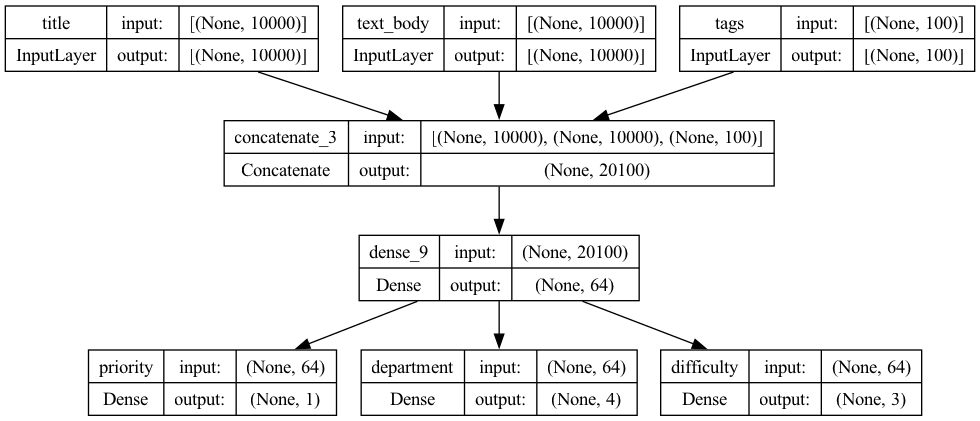

In [ ]:
keras.utils.plot_model(new_model,'updated_ticket_classifier.png',show_shapes=True)


subclassing : in the init method, create the layers required, in the call the method, implement the forward pass of the model and then instantiate the subclass on the input data to create weights.

In [33]:
class CustomerTicketModel(keras.Model):
    def __init__(self,num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_layer = layers.Dense(1, activation='sigmoid')
        self.department_layer = layers.Dense(num_departments, activation='softmax')
    
    def call(self,inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        features = self.concat_layer([title,text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_layer(features)
        department = self.department_layer(features)
        return priority, department


In [34]:
model = CustomerTicketModel(num_departments=4)
priority, department = model({"title":title_data, "text_body":text_data, "tags":tags_data})


In [35]:
priority.shape, department.shape

(TensorShape([1280, 1]), TensorShape([1280, 4]))

Layer is a class which acts as a building block which is used to create a model. Model is a top-level object which has all the useful APIs like train, evaluate, export etc

once this subclass model is instantiated, we can call the compile method, fit method and other methods available like for sequential APIs , functional APIs

In [36]:
model.compile(optimizer='rmsprop',loss=['mean_squared_error','categorical_crossentropy'], metrics=[['mean_absolute_error'],['accuracy']])
model.fit({"title": title_data,
"text_body": text_data,
"tags": tags_data}, [priority_data, department_data], epochs=1)
#order should be the same order in which the call method accepts the arguments and returns the outputs [or dict]

model.evaluate({"title": title_data, "text_body": text_data,
"tags": tags_data}, [priority_data, department_data])


40/40 [==============================] - 1s 10ms/step - loss: 16.3538 - output_1_loss: 0.3355 - output_2_loss: 16.0183 - output_1_mean_absolute_error: 0.5040 - output_2_accuracy: 0.0680


[16.353801727294922,
 0.33548301458358765,
 16.018321990966797,
 0.5040022134780884,
 0.06796874850988388]

sequential , functional and model subclassing in keras can be used together without any problems
Below is an example

In [37]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2): 
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid" 
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)
    def call(self, inputs): 
        return self.dense(inputs)
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs) 
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)



keras.Input is a symbolic tensor like object which does not have values but helps in building the model with weights. else the model will not know of the input 
shape and hence cannot build weigths for each of the layers

we can also create a subclassed model which includes a functional model -> note that previous model had a subclassed model included in the functional model calls

In [38]:
#functional model API 
input = keras.Input(shape=(64,))
outputs = layers.Dense(1,activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

In [39]:
class Model2(keras.Model):
    def __init__(self,num_classes=2):
        super.__init__()
        self.dense = layers.Dense(64, activation='relu')
        self.classifier = binary_classifier
    
    def call(self,inputs):
        features = self.dense(inputs)
        return self.classifier(features)



writing custom metric -> make use of keras.metrics.Metric class and having this as base class , it is easier to develop own custom metric class. add_weights() API is available if this 
class is used as base class

In [40]:
class RootMeanSquaredError(keras.metrics.Metric):
    #constructor
    def __init__(self,name='rmse', **kwargs):
        super().__init__(name=name,**kwargs)
        self.mse_sum = self.add_weight('mse_sum',initializer='zeros')
        self.num_samples = self.add_weight('num_samples',dtype='int32', initializer='zeros')
    # API to update the metric states
    def update_state(self,y_true,y_pred, sample_weight=None):
        y_true=tf.one_hot(y_true, depth=tf.shape(y_pred)[1]) # y_true is an integer label and y_pred is one hot encoded -> so, y_true is also one-hot encoded
        mse_sum = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse_sum)
        num_samples = tf.shape(y_pred)[0]
        self.num_samples.assign_add(num_samples)
    
    # API to return the results
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.num_samples, dtype=tf.float32))
    
    # API to reset the state
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.num_samples.assign(0)
    



In [41]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs) 
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs) 
    return model

In [42]:
model = get_mnist_model()
model.compile('rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy',RootMeanSquaredError()]) # custom metric is also added


In [43]:
from tensorflow.keras.datasets import mnist
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255 
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255 
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [44]:
train_images.shape

(50000, 784)

In [45]:
model.fit(train_images,train_labels,epochs=3,validation_data=(val_images,val_labels))
test_metrics=model.evaluate(test_images,test_labels)

Epoch 1/3
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4478 - accuracy: 0.8743 - rmse: 7.1517 - val_loss: 0.3738 - val_accuracy: 0.9058 - val_rmse: 7.2728
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4310 - accuracy: 0.8911 - rmse: 7.2571 - val_loss: 0.3702 - val_accuracy: 0.9113 - val_rmse: 7.3198
Epoch 3/3
313/313 [==============================] - 1s 5ms/step - loss: 0.4452 - accuracy: 0.8998 - rmse: 7.3309


keras callbacks : there are many - the important ones are Early stopping, modelCheckpoints [to save model given conditions], learning rate adjuster etc 
callback object is passed as a list to model.fit() interrupting in the training based on conditions we give. 
Model can also be saved after training with model.save('filename') and model is loaded with the API : keras.models.load_model('filename')

In [46]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2,), keras.callbacks.ModelCheckpoint(filepath='mnist_model.keras',monitor='val_loss', save_best_only=True,)]


In [47]:
model = get_mnist_model()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,callbacks=callbacks_list,validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4457 - accuracy: 0.8747 - val_loss: 0.3246 - val_accuracy: 0.9156
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4246 - accuracy: 0.8932 - val_loss: 0.3801 - val_accuracy: 0.9070
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4659 - accuracy: 0.8888 - val_loss: 0.3935 - val_accuracy: 0.9083


Creating a custom callback can be done by subclassing keras.callbacks.Callback

In [50]:
import matplotlib.pyplot as plt
class BatchLossHistory(keras.callbacks.Callback):
    def on_train_begin(self,logs):
        self.per_batch_losses = []
    
    def on_batch_end(self,batch,logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self,epoch,logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label="Training loss per batch")
        plt.xlabel(f"Batch (epoch) {epoch}")
        plt.ylabel("loss")
        plt.legend()
        self.per_batch_losses = []

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4442 - accuracy: 0.8745 - val_loss: 0.3803 - val_accuracy: 0.9013
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4273 - accuracy: 0.8927 - val_loss: 0.3684 - val_accuracy: 0.9095
Epoch 3/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4676 - accuracy: 0.8892 - val_loss: 0.4160 - val_accuracy: 0.9047


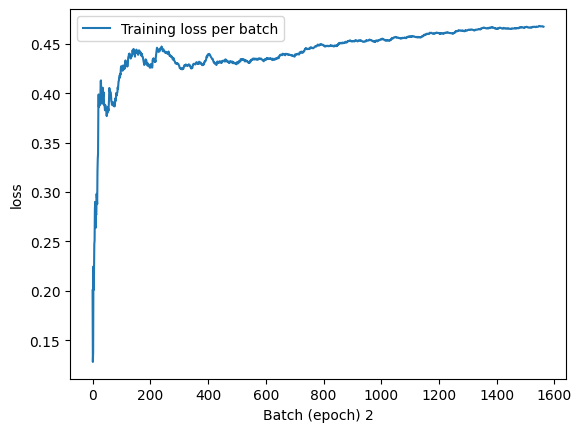

In [53]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          callbacks=[BatchLossHistory()],
          validation_data=(val_images, val_labels))

Tensorboard : a tool to visualize results to collect feedback , monitor important parameters and gain insights into the model.

In [56]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
tensorboard = keras.callbacks.TensorBoard(log_dir='/Users/divyeshkanagavel/Desktop/DeepLearning/DL_nbs')
model.fit(train_images,train_labels,epochs=2, callbacks=[tensorboard], validation_data=(val_images,val_labels))


Epoch 1/2
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4486 - accuracy: 0.8743 - val_loss: 0.3496 - val_accuracy: 0.9078
Epoch 2/2
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4277 - accuracy: 0.8926 - val_loss: 0.3502 - val_accuracy: 0.9158


built in fit method is extremely useful for supervised learning,but if we want to dig deeper for other applications like reinforcement learning, 
semi-supervised learning, generative learning, custom training loop may have to be written. 
so, in these cases, we will implement a custom training method :
forward pass
computation of loss
backward pass of gradients
updation of weights

the behaviour of neural network is different during training and inference -> for example layers like dropout will be different during training and inference.

tape.gradient(loss, model.weights) -> during training we need to call tape.gradient(loss, model.trainable_weights) so that the gradients flow backward only to trainable weights. Among keras built-in layers, batchnorm is the only non-trainable weight layer


Complete custom training and inference code

In [58]:
model = get_mnist_model()
loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.legacy.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

In [63]:
def train_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets,predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs


In [60]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

writing a custom training loop

In [61]:
batch_size = 32

In [65]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(batch_size)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key} : {value:.4f}")


Results at the end of epoch 0
...sparse_categorical_accuracy : 0.9869
...loss : 0.0520
Results at the end of epoch 1
...sparse_categorical_accuracy : 0.9911
...loss : 0.0362
Results at the end of epoch 2
...sparse_categorical_accuracy : 0.9935
...loss : 0.0265


Evaluation loop 

In [66]:
def test_step(inputs,targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets,predictions)
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_"+metric.name] = metric.result()
    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs


In [68]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_dataset = val_dataset.batch(batch_size)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results")
for key,value in logs.items():
    print(f"...{key} : {value:.4f}")


Evaluation results
...val_sparse_categorical_accuracy : 0.9657
...val_loss : 0.2082


the above train_step and test_step are very close to fit() and evaluate keras APIs, but keras API has some performance optimizations, has capabilities of distributed training among GPU clusters etc


One of the performance optimization is the addition of tf.function decorator [Tensorflow function compilation]
By default tf code executes eager execution which has support for debugging [line by line] but performance wise it is not great
Instead , if the model is compiled into a graph, it can be optimized to run on hardware.

In [69]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False) 
    loss = loss_fn(targets, predictions)
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()
    loss_tracking_metric.update_state(loss) 
    logs["val_loss"] = loss_tracking_metric.result() 
    return logs

In [70]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images,val_labels))
val_dataset = val_dataset.batch(batch_size)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results")
for key,value in logs.items():
    print(f"...{key} : {value:.4f}")

Evaluation results
...val_sparse_categorical_accuracy : 0.7971
...val_loss : 3.8166


the eager execution above took 1.8 seconds to run, whereas with tf.function decorator , it has reduced to 0.8 seconds
While debugging and during development, it is better to run in eager execution, once the model is finalized, set it to tf.function mode and run faster

keras fit has many features like callbacks, distributed training.In order to leverage keras.fit() functionalities in our custom training loop, our code can be subclassed from the keras.Model class and the train_step function can be overridden by us which is called by keras.fit() to process the batch

In [71]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

In [80]:
class CustomModel(keras.Model):
    def train_step(self,data):
        inputs,targets = data
        with tf.GradientTape() as tape:
            prediction = self(inputs, training=True)
            loss = loss_fn(targets, prediction)
        gradients = tape.gradient(loss, self.trainable_weights)
        optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        loss_tracker.update_state(loss)
        return {"loss":loss_tracker.result()}
    @property
    def metric(self):
        return [loss_tracker]




In [81]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

In [83]:
model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop()) 
model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4464
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4414
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4446


So, a custom training loop can be written for sequantial,subclassed functional APIs
There is no need to use @tf.function for faster execution. when train_step is overridden, it is called automatically

self.compiled_loss(), self.compiled_metrics(), self.metrics() [includes the losstracking metric] allows us to call update_state for all metrics at once



In [84]:
class CustomModel(keras.Model):
    def train_step(self,data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets,predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        #return log
        return {m.name : m.result() for m in self.metrics}
    


In [85]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(), loss=keras.losses.SparseCategoricalCrossentropy(),
metrics=[keras.metrics.SparseCategoricalAccuracy()]) 
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4478 - sparse_categorical_accuracy: 0.8755
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4282 - sparse_categorical_accuracy: 0.8915
Epoch 3/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4657 - sparse_categorical_accuracy: 0.8891
